# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

C:\ana3\envs\t_f2.2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ana3\envs\t_f2.2\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ana3\envs\t_f2.2\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

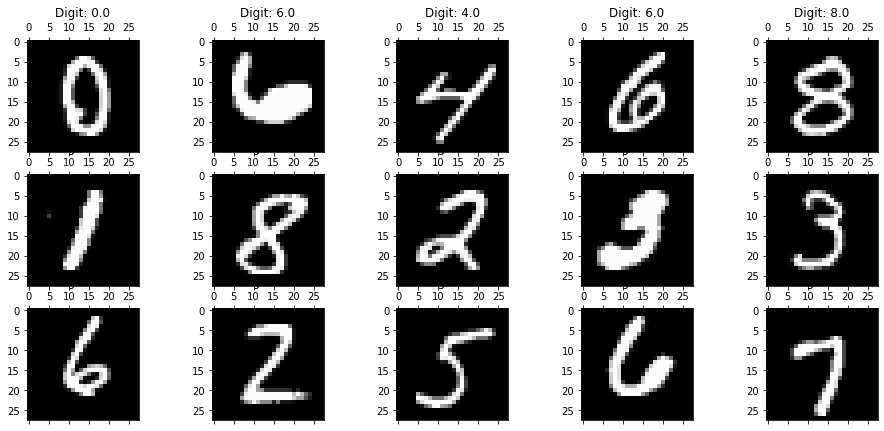

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

### Original / random_forest

In [9]:
import time
start_time = time.time()


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('y',axis=1), df['y'], test_size=0.2, random_state=123 )

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

pred = rf.predict(x_test)
result = (pred == y_test).mean()
print(result)

print("--- %s seconds ---" % (time.time() - start_time))

0.9681428571428572
--- 97.41330003738403 seconds ---


### Original / SVM

In [ ]:
start_time = time.time()


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('y',axis=1), df['y'], test_size=0.2, random_state=123 )

from sklearn.svm import SVC

svm = SVC(kernel='rbf',C=5,gamma=5)
svm.fit(x_train,y_train)
pred = svm.predict(x_test)

result = (pred == y_test).mean()
print(result)

print("--- %s seconds ---" % (time.time() - start_time))

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

### PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()

pipeline = make_pipeline(scaler, pca)
pipeline.fit(x_train,y_train)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [ ]:
print("Eigen value : ", pca.explained_variance_) 
print("주성분에 의해 설명되는 비율 : ", pca.explained_variance_ratio_) 
print("주성분에 의해 설명되는 비율 : ", pca.explained_variance_/ sum(pca.explained_variance_))

In [ ]:
cum_var = 0
for i, v in enumerate(pca.explained_variance_ratio_):
    cum_var = cum_var + v
    if cum_var > 0.95:
        print("95% variance:", i)  
        break

In [ ]:
plt.title("Scree plot")
plt.plot(np.arange(1,401), pca.explained_variance_ratio_[:400])
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

# select 327

### PCA / random forest

In [ ]:
import time
start_time = time.time()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('y',axis=1), df['y'], test_size=0.2, random_state=123 )

x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test)

pca_train, pca_test = PCA(n_components=327).fit_transform(x_train), PCA(n_components=327).fit_transform(x_test)

rf = RandomForestClassifier()
rf.fit(pca_train, y_train)

pred = rf.predict(x_test_reduced)
result = (pred == y_test).mean()
print(result)

print("--- %s seconds ---" % (time.time() - start_time))

### PCA / SVM

In [ ]:
start_time = time.time()


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('y',axis=1), df['y'], test_size=0.2, random_state=123 )

from sklearn.svm import SVC

svm = SVC(kernel='rbf',C=5,gamma=5)
svm.fit(x_train,y_train)
pred = svm.predict(x_test)

result = (pred == y_test).mean()
print(result)

print("--- %s seconds ---" % (time.time() - start_time))

### LDA

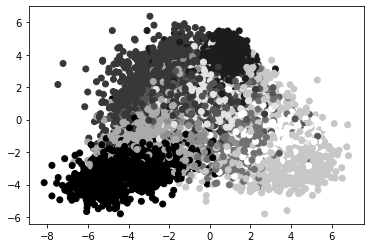

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda_features = lda.fit_transform(x_train, y_train)


lc1 = lda_features[:,0]
lc2 = lda_features[:,1]
plt.scatter(lc1,lc2,c=y_train)
plt.show();

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

### 2번하면서 한꺼번에 진행

특정한 틀 없이 자유롭게 해주시면 됩니다!